In [1]:
import pandas, numpy

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# 0. user-defined variables

In [4]:
input_file = '/Users/adrian/research/akthelia/results/000_quantification/DESeq2_TPM_values.tsv'

# 1. read expression

In [5]:
expression = pandas.read_csv(input_file, sep='\t', index_col=0)
print(expression.shape)
expression

(39546, 24)


,T0570_011_T24_R1,T0570_011_T24_R2,T0570_011_T24_R3,T0570_011_T6_R1,T0570_011_T6_R2,T0570_011_T6_R3,T0570_DMSO_T24_R1,T0570_DMSO_T24_R2,T0570_DMSO_T24_R3,T0570_DMSO_T6_R1,...,T84_011_T24_R3,T84_011_T6_R1,T84_011_T6_R2,T84_011_T6_R3,T84_DMSO_T24_R1,T84_DMSO_T24_R2,T84_DMSO_T24_R3,T84_DMSO_T6_R1,T84_DMSO_T6_R2,T84_DMSO_T6_R3
ENSG00000000003,8.860213,9.326157,10.499659,7.691401,11.744621,9.980379,12.871965,7.928664,12.850338,7.974109,...,27.364269,28.757089,36.863400,40.753875,27.551802,42.158398,23.354938,42.785347,45.575846,35.080536
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.266745,5.437045,6.561259,5.854814,1.261758,1.365019,1.670363,1.825292,1.121831,2.226439
ENSG00000000419,138.378167,120.260497,160.045045,93.170740,127.545393,119.280983,119.850366,79.046861,108.212273,90.223339,...,80.096376,51.968925,93.184885,88.088689,50.494726,91.962779,46.322155,108.437170,115.016190,95.876082
ENSG00000000457,2.127435,1.729485,2.956090,1.494563,2.566169,2.224862,2.728498,1.685466,2.430942,1.552216,...,2.618565,3.156040,3.619716,4.367703,2.087686,3.247656,2.679391,4.937851,7.636883,3.542982
ENSG00000000460,4.827474,4.566990,6.748218,5.147102,7.030387,5.390039,6.833042,4.902507,6.809534,6.568217,...,7.064973,7.495705,10.214811,12.244486,10.142476,17.388479,9.845306,16.388441,28.912571,14.840780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000291297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.193177,0.000000,0.000000,0.141508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000291298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000291299,2.182103,2.040683,2.485228,2.203750,3.967211,3.677709,3.183826,2.587823,2.352475,2.759400,...,0.786276,0.455353,0.335044,0.561665,1.039503,0.113119,0.318586,1.210956,4.248745,0.846872
ENSG00000291300,0.000000,0.000000,0.021410,0.361416,0.021903,0.000000,0.000000,0.000000,0.000000,0.079046,...,0.116973,0.000000,0.018998,0.000000,0.016477,0.063471,0.000000,0.000000,0.000000,0.038459


In [13]:
columns2drop = []
for element in expression.columns:
    if 'T0570' not in element:
        columns2drop.append(element)
expression.drop(columns2drop, axis='columns', inplace=True)
print(expression.shape)
expression.head()

(39546, 12)


,T0570_011_T24_R1,T0570_011_T24_R2,T0570_011_T24_R3,T0570_011_T6_R1,T0570_011_T6_R2,T0570_011_T6_R3,T0570_DMSO_T24_R1,T0570_DMSO_T24_R2,T0570_DMSO_T24_R3,T0570_DMSO_T6_R1,T0570_DMSO_T6_R2,T0570_DMSO_T6_R3
ENSG00000000003,8.860213,9.326157,10.499659,7.691401,11.744621,9.980379,12.871965,7.928664,12.850338,7.974109,8.422875,8.773100
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,138.378167,120.260497,160.045045,93.170740,127.545393,119.280983,119.850366,79.046861,108.212273,90.223339,98.478485,106.995914
ENSG00000000457,2.127435,1.729485,2.956090,1.494563,2.566169,2.224862,2.728498,1.685466,2.430942,1.552216,1.496365,1.718880
ENSG00000000460,4.827474,4.566990,6.748218,5.147102,7.030387,5.390039,6.833042,4.902507,6.809534,6.568217,6.324085,6.193122


# 3. filter and transform

In [7]:
substantial_expression = expression[expression.max(axis=1) >= 2]
high_expression = expression[expression.max(axis=1) >= 100]

print(substantial_expression.shape)
print(high_expression.shape)

(13571, 12)
(1703, 12)


In [8]:
transpose = substantial_expression.transpose()
pca_substantial_expression = numpy.log2(transpose + 1)

transpose = high_expression.transpose()
pca_high_expression = numpy.log2(transpose + 1)

# 4. visualize substantial expression

In [9]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_substantial_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.36642407 0.21197744]


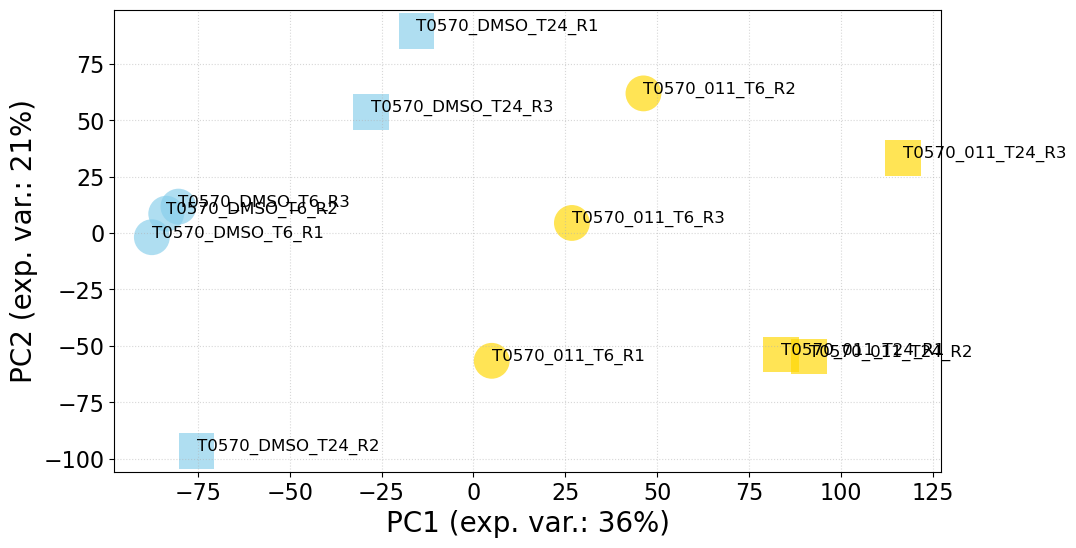

In [10]:
for i in range(len(new)):

    # colors
    if '011' in expression.columns[i]:
        the_color = 'gold'
    else:
        the_color = 'skyblue'

    # markers
    if 'T6' in expression.columns[i]:
        the_marker = 'o'
    else:
        the_marker = 's'
    
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=the_color, marker=the_marker, alpha=2/3, edgecolors='none')
    epsilon = 0
    matplotlib.pyplot.text(new[i,0], new[i,1], expression.columns[i], size=12)

#matplotlib.pyplot.legend(legend_elements, ['h1', 'h2 low', 'h2 high', 'KO', 'WT'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('pca.svg')

# 4. visualize high expression

In [11]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_high_expression)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.3830892  0.21969372]


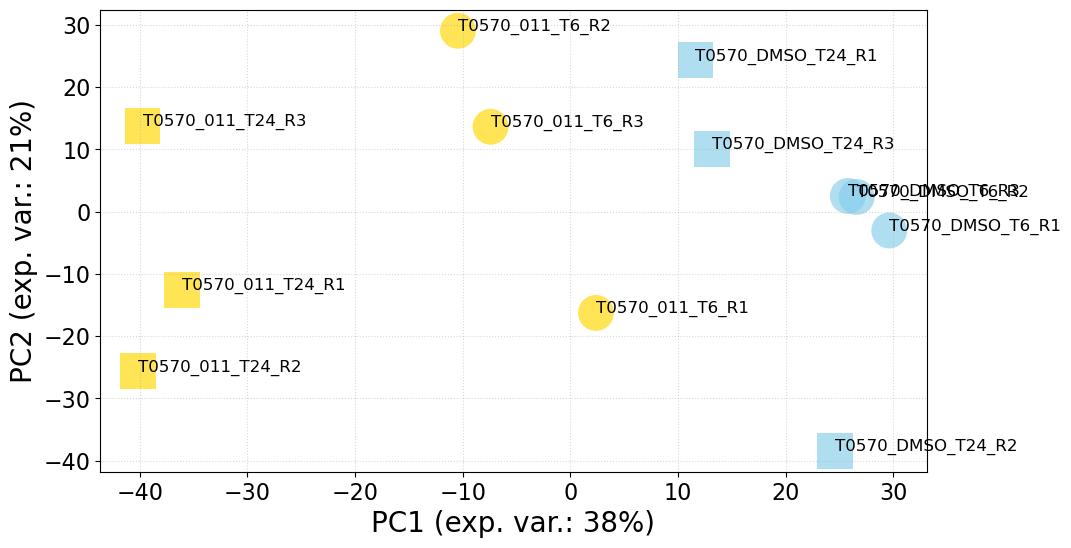

In [12]:
for i in range(len(new)):
    
    # colors
    if '011' in expression.columns[i]:
        the_color = 'gold'
    else:
        the_color = 'skyblue'

    # markers
    if 'T6' in expression.columns[i]:
        the_marker = 'o'
    else:
        the_marker = 's'
        
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=666, c=the_color, marker=the_marker, alpha=2/3, edgecolors='none')
    matplotlib.pyplot.text(new[i,0], new[i,1], expression.columns[i], size=12)
    
matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')
matplotlib.pyplot.show()